In [1]:
import pandas as pd


cols_to_include = ['host_is_superhost',
                   'accommodates',
                   'bedrooms',
                   'neighbourhood_cleansed',
                   'room_type',
                   'price',
                   'instant_bookable',
                   'number_of_reviews',
                   'reviews_per_month',
                   'review_scores_rating'
                  ]

df = pd.read_csv("toronto_listings.csv", usecols=cols_to_include, compression='infer')



print(df.isnull().sum())
print(len(df[df.number_of_reviews == 0]))
print(len(df.index))

host_is_superhost           16
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bedrooms                  1212
price                        0
number_of_reviews            0
review_scores_rating      3871
instant_bookable             0
reviews_per_month         3679
dtype: int64
3679
15832


In [2]:
# 3679 rows where there values for 'reviews_per_month'
# are null, let's fix this by changing the nulls to 0
df['reviews_per_month'].fillna(0, inplace=True)


# At this point we can drop rows
# with bad values 
df = df[df.bedrooms != 0]
df = df[df.price != 0]
df = df.dropna(axis=0)

print(df.isnull().sum())
print(len(df.index))

host_is_superhost         0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bedrooms                  0
price                     0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
reviews_per_month         0
dtype: int64
11048


In [3]:
# Here we remove the dollar sign from the price
# and change the data type from object to float
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

# Change the data type for 'host_is_superhost' to int and convert
# the values t and f to 1 and 0
df['host_is_superhost'] = df['host_is_superhost'].replace('t', '1', \
        regex=True).replace('f', '0', regex=True).astype(int)

df[['price', 'host_is_superhost']].head(5)

,price,host_is_superhost
0,469.0,0
1,96.0,0
2,72.0,0
4,128.0,0
5,100.0,0


In [4]:

# Dummie columns for categorical variables
n_dummies = pd.get_dummies(df.neighbourhood_cleansed)
rt_dummies = pd.get_dummies(df.room_type)

# Convert the boolean column 'instant_bookable' so that it shows
# one boolean value (0 or 1) 
ib_dummies = pd.get_dummies(df.instant_bookable, prefix="instant")
ib_dummies = ib_dummies.drop('instant_f', axis=1)

# Here we replace the old columns with the new encoded ones
new_data = pd.concat((df.drop(['neighbourhood_cleansed', \
    'room_type', 'instant_bookable'], axis=1), \
    n_dummies.astype(int), rt_dummies.astype(int), \
    ib_dummies.astype(int)), axis=1)

new_data.head(10)

,host_is_superhost,accommodates,bedrooms,price,number_of_reviews,review_scores_rating,reviews_per_month,Agincourt North,Agincourt South-Malvern West,Alderwood,...,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,Entire home/apt,Hotel room,Private room,Shared room,instant_t
0,0,10,5.0,469.0,7,100.0,0.10,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,2,1.0,96.0,169,97.0,1.21,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,3,1.0,72.0,217,95.0,1.66,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,2,1.0,128.0,1,100.0,0.01,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,5,2.0,100.0,111,92.0,0.87,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,4,2.0,93.0,31,99.0,0.62,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,2,1.0,101.0,57,82.0,0.45,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,1,2,1.0,79.0,8,80.0,0.07,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,1,2,1.0,86.0,18,84.0,0.14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,1,3,1.0,123.0,58,93.0,0.47,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:title={'center':'Amount of listings per neighbourhood'}>

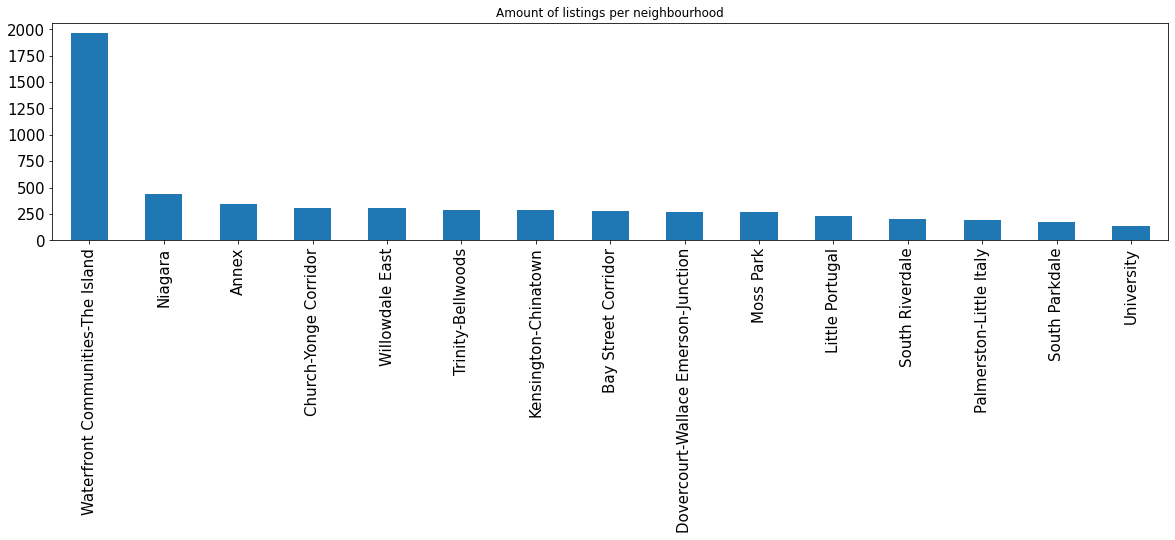

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


plt.figure(figsize=(20, 4))
plt.title('Amount of listings per neighbourhood')
df['neighbourhood_cleansed'].value_counts()[:15].plot(kind='bar', fontsize=15)

<AxesSubplot:title={'center':'Average price per neighbourhood'}, xlabel='neighbourhood_cleansed'>

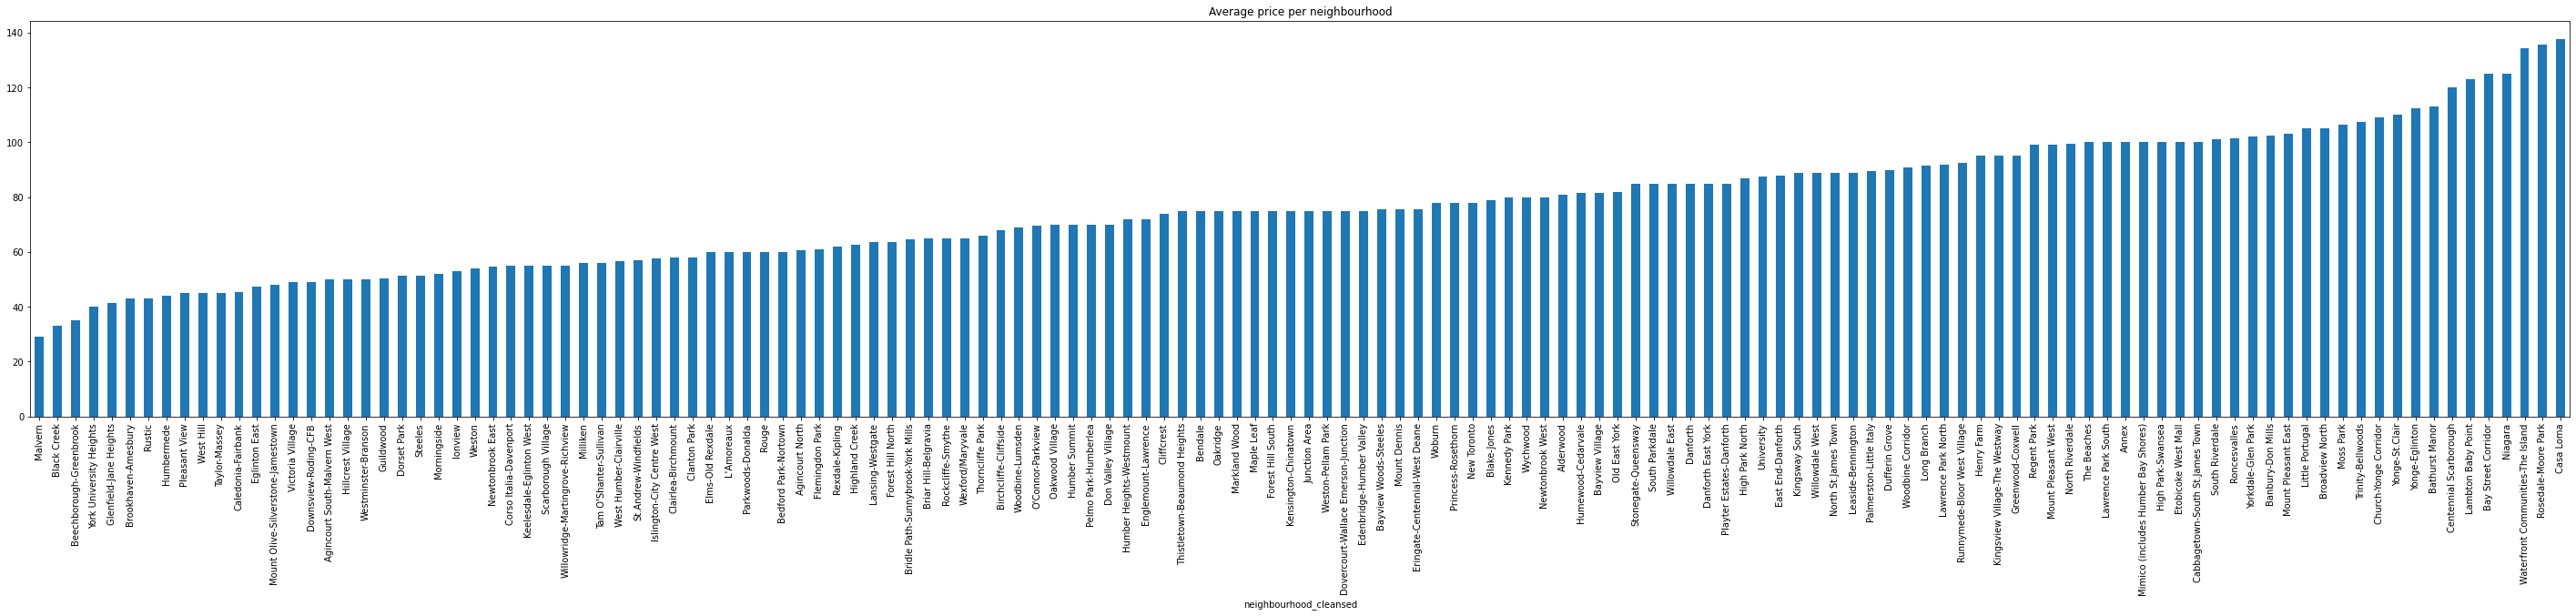

In [6]:

sort_prices = df.groupby('neighbourhood_cleansed')['price'].median().sort_values()
sort_prices.plot(kind='bar', figsize=(50,8), title='Average price per neighbourhood')

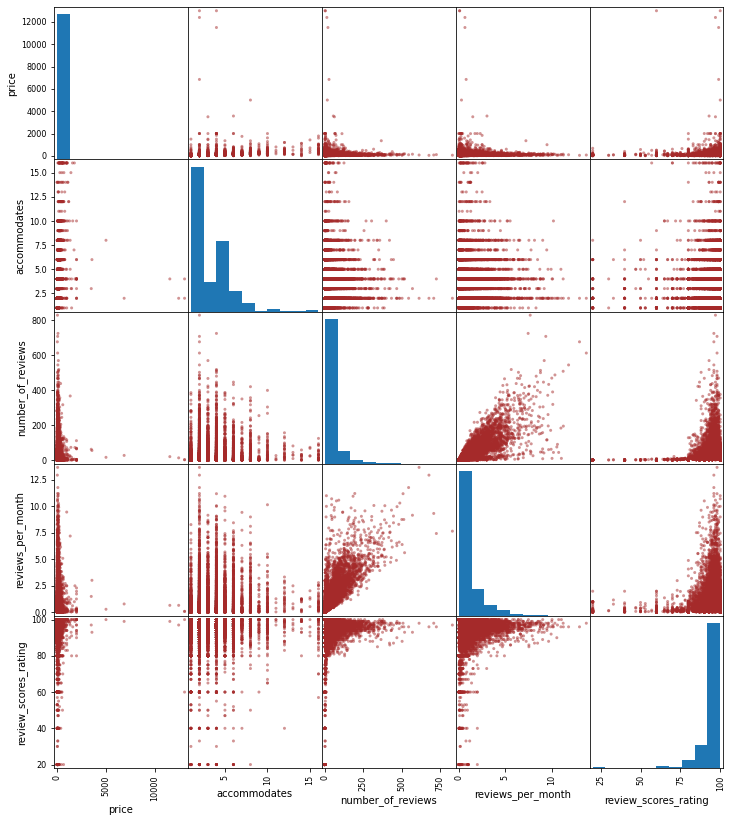

In [7]:

scattercols = ['price', 'accommodates', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating']
axs = pd.plotting.scatter_matrix(df[scattercols], figsize=(12, 14), c='brown')

In [8]:
print(df.corr()['price'])

host_is_superhost      -0.008055
accommodates            0.226609
bedrooms                0.215223
price                   1.000000
number_of_reviews      -0.007332
review_scores_rating    0.018966
reviews_per_month      -0.013113
Name: price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

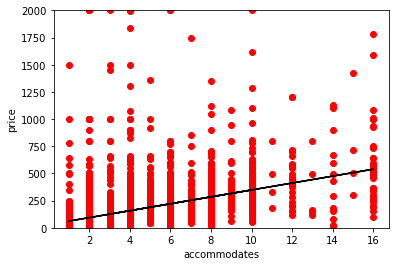

In [11]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np

lr = linear_model.LinearRegression()
x = df['accommodates'].values[:, np.newaxis]
y = df['price']
clf = lr.fit(x, y)
plt.scatter(x,y,color='red')
plt.plot(x, clf.predict(x), color='black')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.ylim([0, 2000])
plt.show

Text(0.5, 1.0, 'Variable importance')

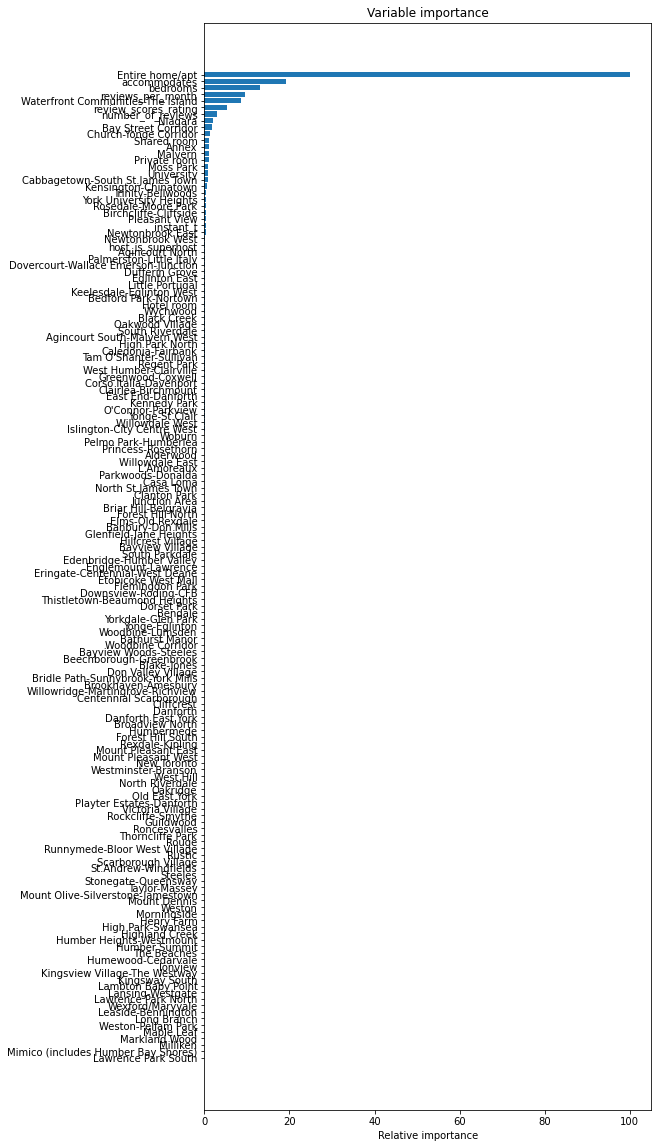

In [12]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop(['price'], axis =1),new_data.price, test_size=0.2, random_state=20)

tuned_parameters = {
    "n_estimators": [ 500 ],
    "max_depth": [ 4 ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 2 ],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='neg_median_absolute_error')
preds = clf.fit(x_train, y_train)
best = clf.best_estimator_

feature_importance = clf.best_estimator_.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = x_train.columns[sorted_idx]
plt.figure(figsize=(8,20))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative importance')
plt.title('Variable importance')